<a href="https://colab.research.google.com/github/Rohit4352/Campus_recruitment/blob/master/campus_recruit_eda_visualize_regressor_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Campus Recruitment
   
   Academic and Employability Factors influencing placement

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json;

%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing dataset

In [5]:
dataframe = pd.read_csv('Placement_Data_Full_Class.csv')
dataframe.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Data Explortion

**To use pandas profiling update the library or use the notebook in kaggle kerenl**

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(dataframe);

In [ ]:
profile.to_widgets()

***Averge percentage you require to get placed***

In [6]:
df = pd.DataFrame.drop(dataframe,columns=["gender","ssc_b","hsc_b","hsc_s"])
df_new = df.groupby(by  = 'status').mean()
df_new

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
status,,,,,,,
Not Placed,110.477612,57.544030,58.395522,61.134179,69.587910,61.612836,NaN
Placed,106.878378,71.721486,69.926554,68.740541,73.238041,62.579392,288655.405405


# Data visualisation

***Number of students from central, other boards in different class***

Text(0.5, 20.800000000000004, 'prefered subjects')

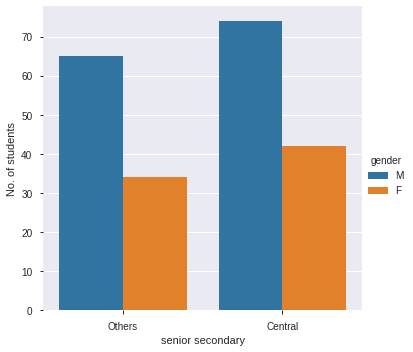

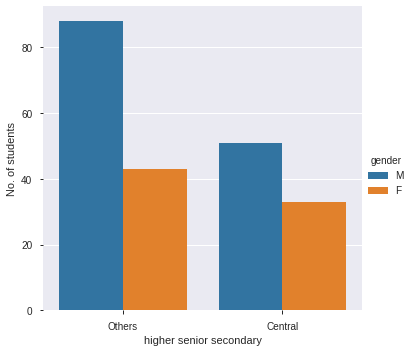

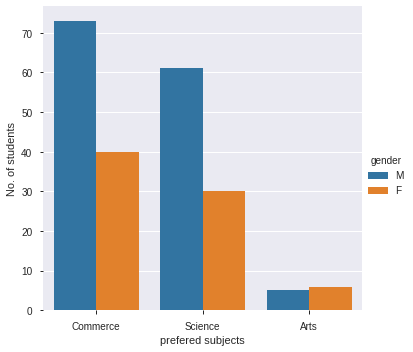

In [7]:
sns.catplot(x="ssc_b",hue="gender",data=dataframe, kind="count",)
plt.ylabel("No. of students")
plt.xlabel("senior secondary")
sns.catplot(x="hsc_b",hue="gender",data=dataframe, kind="count")
plt.ylabel("No. of students")
plt.xlabel("higher senior secondary")
sns.catplot(x="hsc_s",hue="gender",data=dataframe, kind="count")
plt.ylabel("No. of students")
plt.xlabel("prefered subjects")

***Higher secondary percentage gender wise***

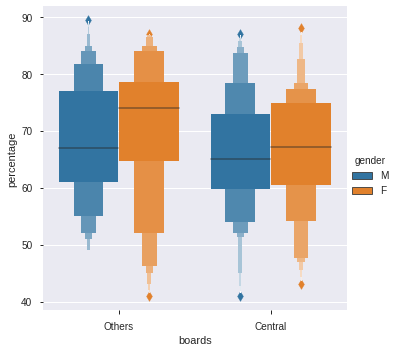

In [8]:
sns.catplot(x="ssc_b",y="ssc_p",hue="gender",data=dataframe,kind="boxen");
plt.ylabel("percentage");
plt.xlabel("boards");

    Average percentage of girls in both boards is higher than boys

***Work experience for stdents in different degrees***

Text(0.5, 20.800000000000004, 'work exp in different degrees')

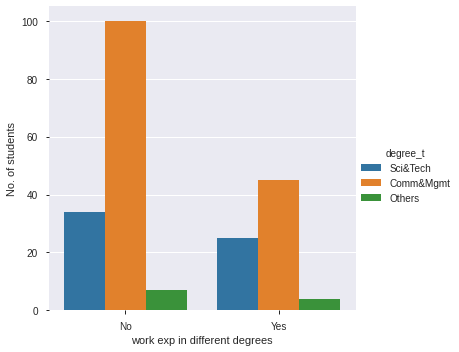

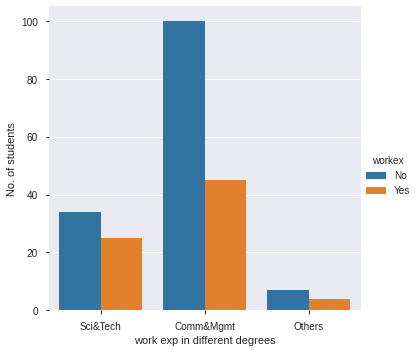

In [9]:
sns.catplot(x="workex",hue="degree_t",data=dataframe, kind="count", )
plt.ylabel("No. of students")
plt.xlabel("work exp in different degrees")
sns.catplot(x="degree_t",hue="workex",data=dataframe, kind="count")
plt.ylabel("No. of students")
plt.xlabel("work exp in different degrees")

***which stream is prefered by students the most***

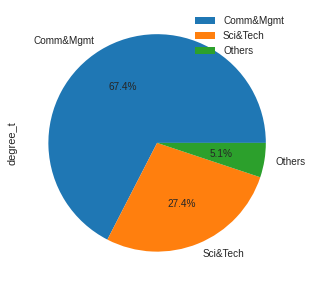

In [10]:
df1 = pd.DataFrame(dataframe['degree_t'].value_counts(normalize=True))
plot = df1.plot.pie(y='degree_t', autopct='%1.1f%%', figsize=(5, 5))

***percentage of specialisation***

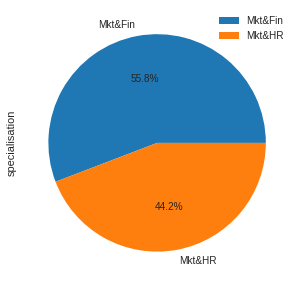

In [11]:
df2 = pd.DataFrame(dataframe['specialisation'].value_counts(normalize=True))
plot = df2.plot.pie(y='specialisation', autopct='%1.1f%%', figsize=(5, 5))

***Students that got placement***

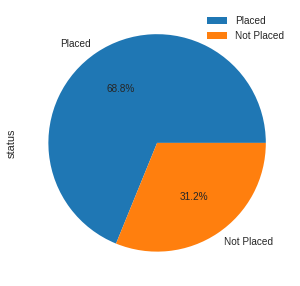

In [12]:
df3 = pd.DataFrame(dataframe['status'].value_counts(normalize=True))
plot = df3.plot.pie(y='status', autopct='%1.1f%%', figsize=(5, 5))

**Data Distribution**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f57c77e80>,
      dtype=object)

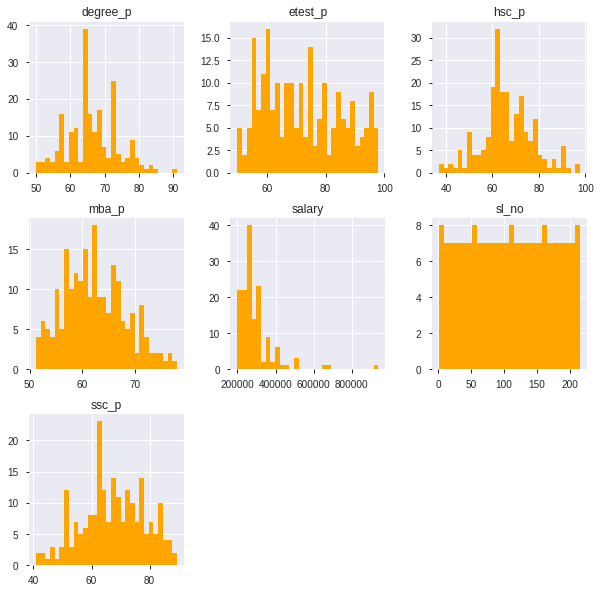

In [13]:
dataframe.hist(bins = 30, figsize=(10,10), color= 'orange')

**finding the salary outliers**

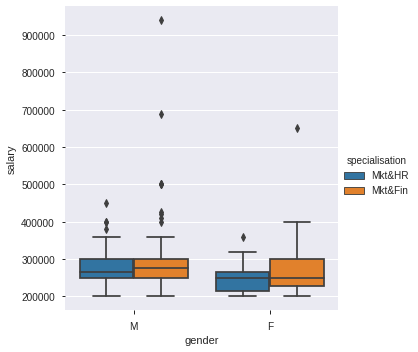

In [14]:
sns.catplot(y="salary",x="gender",data=dataframe, kind="box", hue="specialisation" )

In [ ]:
!pip install plotly --upgrade

In [15]:
import plotly.express as px
dfc=pd.DataFrame(dataframe.groupby(['gender','specialisation','status'])['sl_no'].count()).rename(columns={'sl_no': 'no. of students'}).reset_index()

fig = px.sunburst(dfc, path=['gender','status','specialisation'], values='no. of students')
fig.update_layout(title="Placement % of mba in each specialisation by gender ",title_x=0.5)
fig.show()

# Encoding the categorical data

In [16]:
df["degree_t"] = df["degree_t"].astype('category')
df["workex"] = df["workex"].astype('category')
df["specialisation"] = df["specialisation"].astype('category')
df["status"] = df["status"].astype('category')
df.dtypes
df["workex"] = df["workex"].cat.codes
df["degree_t"] = df["degree_t"].cat.codes
df["specialisation"] = df["specialisation"].cat.codes
df["status"] = df["status"].cat.codes
df.tail()

,sl_no,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,80.6,82.0,77.6,0,0,91.0,0,74.49,1,400000.0
211,212,58.0,60.0,72.0,2,0,74.0,0,53.62,1,275000.0
212,213,67.0,67.0,73.0,0,1,59.0,0,69.72,1,295000.0
213,214,74.0,66.0,58.0,0,0,70.0,1,60.23,1,204000.0
214,215,62.0,58.0,53.0,0,0,89.0,1,60.22,0,NaN


# Classification of placement status

In [17]:
df_class = df.copy()

In [18]:
X = df_class.iloc[:,:-2].values
y = df_class.iloc[:,-2].values

## Split the dataset

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=0)

**Train Logistic Regression Model**

In [20]:
from sklearn.linear_model import LogisticRegression
lg_classifier = LogisticRegression(random_state=0,max_iter=1000)
lg_classifier.fit(X_train, y_train)
y_pred_lgclass = lg_classifier.predict(X_test)

## Train Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100,criterion="entropy")
rf_classifier.fit(X_train, y_train)
y_pred_rfclass = rf_classifier.predict(X_test)

In [22]:
print(np.concatenate((y_pred_rfclass.reshape(len(y_pred_rfclass),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]]


***Accuracy/Confusion matrix***

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_rfclass)
print(cm)
print("random forest accuracy: {:2.2f}%" .format(accuracy_score(y_test, y_pred_rfclass) * 100) )

[[ 5  7]
 [ 3 18]]
random forest accuracy: 69.70%


In [24]:
cm = confusion_matrix(y_test, y_pred_lgclass)
print(cm)
print("Logistic regressor accuracy: {:2.2f}%" .format(accuracy_score(y_test, y_pred_lgclass)*100) )

[[ 7  5]
 [ 3 18]]
Logistic regressor accuracy: 75.76%


## Pre processing data

In [25]:
df.dropna(inplace=True)
df

,sl_no,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,79.33,78.33,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,65.00,68.00,64.00,0,0,75.0,0,57.80,1,250000.0
4,5,85.80,73.60,73.30,0,0,96.8,0,55.50,1,425000.0
7,8,82.00,64.00,66.00,2,1,67.0,0,62.14,1,252000.0
...,...,...,...,...,...,...,...,...,...,...,...
209,210,62.00,72.00,65.00,0,0,67.0,0,56.49,1,216000.0
210,211,80.60,82.00,77.60,0,0,91.0,0,74.49,1,400000.0
211,212,58.00,60.00,72.00,2,0,74.0,0,53.62,1,275000.0
212,213,67.00,67.00,73.00,0,1,59.0,0,69.72,1,295000.0


**Skewness of salary plot**

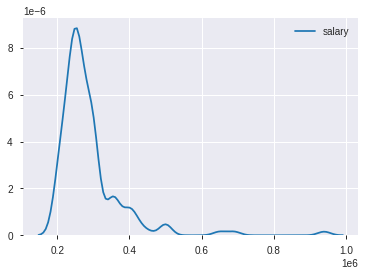

In [26]:
#PDF of Salary
sns.kdeplot(df["salary"])
plt.show()

In [27]:
df = df[df["salary"]<350000.0]
df

,sl_no,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,58.00,2,0,55.00,1,58.80,1,270000.0
1,2,79.33,78.33,77.48,2,1,86.50,0,66.28,1,200000.0
2,3,65.00,68.00,64.00,0,0,75.00,0,57.80,1,250000.0
7,8,82.00,64.00,66.00,2,1,67.00,0,62.14,1,252000.0
8,9,73.00,79.00,72.00,0,0,91.34,0,61.29,1,231000.0
...,...,...,...,...,...,...,...,...,...,...,...
207,208,83.33,78.00,61.00,0,1,88.56,0,71.55,1,300000.0
209,210,62.00,72.00,65.00,0,0,67.00,0,56.49,1,216000.0
211,212,58.00,60.00,72.00,2,0,74.00,0,53.62,1,275000.0
212,213,67.00,67.00,73.00,0,1,59.00,0,69.72,1,295000.0


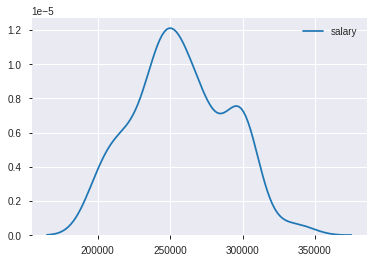

In [28]:
sns.kdeplot(df["salary"])
plt.show()

In [29]:
#select the features of regression model
X = df.iloc[:,:-2].values
y = df.iloc[:,-1].values

# Build regression model

In [30]:
#splitting into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [31]:
y_test

array([300000., 240000., 236000., 240000., 200000., 240000., 300000.,
       218000., 250000., 340000., 240000., 250000., 300000., 300000.,
       250000., 240000., 270000., 204000., 204000., 268000., 250000.,
       300000., 300000., 278000., 250000.])

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_m = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_m.reshape(len(y_pred_m),1), y_test.reshape(len(y_test),1)),1))

[[254735.42 300000.  ]
 [264522.38 240000.  ]
 [252505.82 236000.  ]
 [253355.43 240000.  ]
 [259259.54 200000.  ]
 [253543.56 240000.  ]
 [250599.53 300000.  ]
 [257033.26 218000.  ]
 [252007.54 250000.  ]
 [271450.24 340000.  ]
 [257381.2  240000.  ]
 [268665.6  250000.  ]
 [252640.97 300000.  ]
 [265377.05 300000.  ]
 [252008.59 250000.  ]
 [251791.68 240000.  ]
 [252260.64 270000.  ]
 [266974.8  204000.  ]
 [258119.18 204000.  ]
 [251009.64 268000.  ]
 [268208.99 250000.  ]
 [258249.35 300000.  ]
 [257664.86 300000.  ]
 [246049.1  278000.  ]
 [257683.46 250000.  ]]


In [33]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfregressor.fit(X_train, y_train)
y_pred_r = rfregressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_r.reshape(len(y_pred_r),1), y_test.reshape(len(y_test),1)),1))

[[227300. 300000.]
 [249100. 240000.]
 [261500. 236000.]
 [254500. 240000.]
 [244200. 200000.]
 [239000. 240000.]
 [273600. 300000.]
 [266200. 218000.]
 [261500. 250000.]
 [285700. 340000.]
 [257000. 240000.]
 [261600. 250000.]
 [245600. 300000.]
 [246200. 300000.]
 [266100. 250000.]
 [262600. 240000.]
 [241600. 270000.]
 [257600. 204000.]
 [237300. 204000.]
 [247800. 268000.]
 [241500. 250000.]
 [270300. 300000.]
 [243000. 300000.]
 [268200. 278000.]
 [249600. 250000.]]


In [34]:
from sklearn.metrics import r2_score
print("R2 score")
print("multiple regressor " + str(r2_score(y_test, y_pred_m)))
print("random forest "+ str(r2_score(y_test, y_pred_r)))

R2 score
multiple regressor -0.031591117030895344
random forest 0.010640250790781791


In [35]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
print("Mean Absolute error")
MAE = mean_absolute_error(y_test, y_pred_m)
print("Multiple linear regressor "+str(MAE))
MAE = mean_absolute_error(y_test, y_pred_r)
print("Random forest regressor "+ str(MAE))

Mean Absolute error
Multiple linear regressor 30280.969416619148
Random forest regressor 28952.0


# Getting the final regression equation with the values of the coefficients

In [36]:
print(regressor.coef_)
print(regressor.intercept_)

[   46.67    18.95   223.75  -581.15  2897.14  9696.97    74.4  -6046.06
  -217.19]
279589.9683746573


Therefore, the equation of our multiple linear regression model is:

$$\textrm{salary} = 5.21 \times \textrm{ssc_p} + 165 \times \textrm{hsc_p} - 636 \times \textrm{degree_p} + 2740 \times \textrm{degree_t} + 10200 \times \textrm{workex} + 108 \times \textrm{etest_p} - 5680 \times \textrm{specialisation} - 202 \times \textrm{mba_p} + 289872.4$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.